In [171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('r1.csv')
df.head(10)

,File,Reciprocal,Time,Reciprocal(Integral),Time.1,error,%Reduction in Time,Real,Time.2
0,POSCAR1,8537.094042,0.037576,8537.094162,0.018272,0.000120,51.372618,1471.861593,0.000094
1,NaN,8537.094042,0.029313,8537.094162,0.017172,0.000120,41.419574,1471.861593,0.000094
2,NaN,8537.094042,0.035333,8537.094162,0.022344,0.000120,36.762671,1471.861593,0.000093
3,NaN,8537.094042,0.077566,8537.094162,0.018987,0.000120,75.521061,1471.861593,0.000821
4,NaN,8537.094042,0.028673,8537.094162,0.018402,0.000120,35.823316,1471.861593,0.001319
5,POSCAR2,24942.128517,0.153536,24942.127900,0.033799,0.000617,77.986407,5449.132509,0.000359
6,NaN,24942.128517,0.107117,24942.127900,0.037452,0.000617,65.036746,5449.132509,0.000357
7,NaN,24942.128517,0.184761,24942.127900,0.038444,0.000617,79.192575,5449.132509,0.000363
8,NaN,24942.128517,0.121347,24942.127900,0.041516,0.000617,65.787368,5449.132509,0.000358
9,NaN,24942.128517,0.167226,24942.127900,0.039246,0.000617,76.531394,5449.132509,0.000361


In [172]:
new_df = df.drop(columns=['File'],inplace=False)
df['Reciprocal'].mean()
new_df.head(10)

,Reciprocal,Time,Reciprocal(Integral),Time.1,error,%Reduction in Time,Real,Time.2
0,8537.094042,0.037576,8537.094162,0.018272,0.000120,51.372618,1471.861593,0.000094
1,8537.094042,0.029313,8537.094162,0.017172,0.000120,41.419574,1471.861593,0.000094
2,8537.094042,0.035333,8537.094162,0.022344,0.000120,36.762671,1471.861593,0.000093
3,8537.094042,0.077566,8537.094162,0.018987,0.000120,75.521061,1471.861593,0.000821
4,8537.094042,0.028673,8537.094162,0.018402,0.000120,35.823316,1471.861593,0.001319
5,24942.128517,0.153536,24942.127900,0.033799,0.000617,77.986407,5449.132509,0.000359
6,24942.128517,0.107117,24942.127900,0.037452,0.000617,65.036746,5449.132509,0.000357
7,24942.128517,0.184761,24942.127900,0.038444,0.000617,79.192575,5449.132509,0.000363
8,24942.128517,0.121347,24942.127900,0.041516,0.000617,65.787368,5449.132509,0.000358
9,24942.128517,0.167226,24942.127900,0.039246,0.000617,76.531394,5449.132509,0.000361


In [173]:
step = 5
out = new_df.groupby(new_df.index//step).mean()
out.head(5)

,Reciprocal,Time,Reciprocal(Integral),Time.1,error,%Reduction in Time,Real,Time.2
0,8537.094042,0.041692,8537.094162,0.019035,0.000120,48.179848,1471.861593,0.000484
1,24942.128517,0.146797,24942.127900,0.038091,0.000617,72.906898,5449.132509,0.000360
2,16858.918725,0.269169,16858.918249,0.084749,0.000476,67.655013,1177.157826,0.000827
3,23377.601612,0.416348,23377.601975,0.076450,0.000363,81.636284,-4487.194457,0.001408
4,13144.864811,0.642339,13144.863664,0.096842,0.001147,84.923158,-3841.811527,0.002203


In [174]:
out.insert(0, "Number of Atoms", [200,400,600,800,1000,1500,3000,6000,12000,24000,30000,48000,60000,75000], True)
out.to_csv('mean.csv')
out.head()

,Number of Atoms,Reciprocal,Time,Reciprocal(Integral),Time.1,error,%Reduction in Time,Real,Time.2
0,200,8537.094042,0.041692,8537.094162,0.019035,0.000120,48.179848,1471.861593,0.000484
1,400,24942.128517,0.146797,24942.127900,0.038091,0.000617,72.906898,5449.132509,0.000360
2,600,16858.918725,0.269169,16858.918249,0.084749,0.000476,67.655013,1177.157826,0.000827
3,800,23377.601612,0.416348,23377.601975,0.076450,0.000363,81.636284,-4487.194457,0.001408
4,1000,13144.864811,0.642339,13144.863664,0.096842,0.001147,84.923158,-3841.811527,0.002203


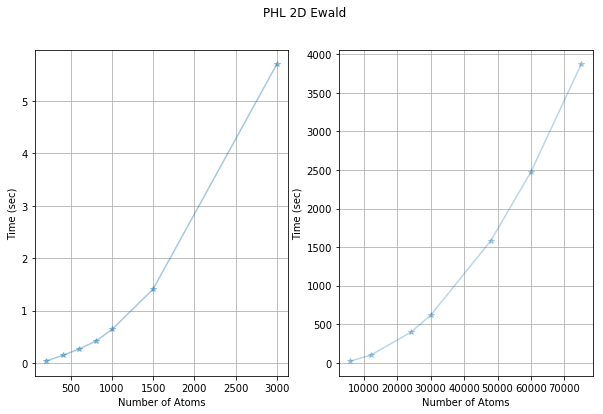

In [175]:
fig, ax = plt.subplots(1, 2,figsize=(10,6))
fig.suptitle("PHL 2D Ewald")
ax[0].plot('Number of Atoms','Time', data=out[out['Number of Atoms'] < 3001], marker='*', alpha=0.4)
ax[0].set_xlabel("Number of Atoms")
ax[0].set_ylabel("Time (sec)")
ax[0].grid()
 
# And now add something in the second part:
ax[1].plot(  'Number of Atoms','Time', data=out[out['Number of Atoms'] > 3001], marker='*', alpha=0.3)
ax[1].set_xlabel("Number of Atoms")
ax[1].set_ylabel("Time (sec)")
ax[1].grid()
# Show the graph
plt.show()

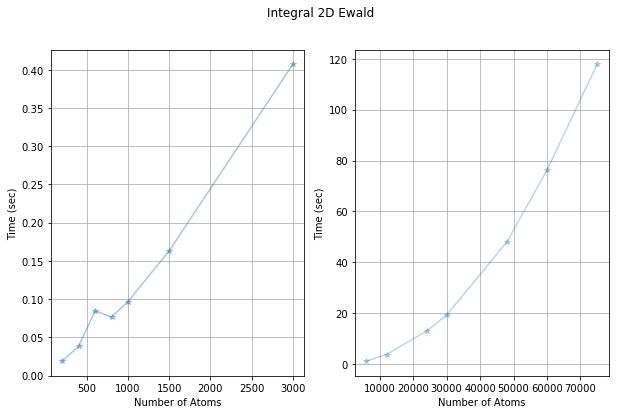

In [176]:
fig, ax = plt.subplots(1, 2,figsize=(10,6))
fig.suptitle("Integral 2D Ewald")
ax[0].plot('Number of Atoms','Time.1', data=out[out['Number of Atoms'] < 3001], marker='*', alpha=0.4)
ax[0].set_xlabel("Number of Atoms")
ax[0].set_ylabel("Time (sec)")
ax[0].grid()
 
# And now add something in the second part:
ax[1].plot(  'Number of Atoms','Time.1', data=out[out['Number of Atoms'] > 3001], marker='*', alpha=0.3)
ax[1].set_xlabel("Number of Atoms")
ax[1].set_ylabel("Time (sec)")
ax[1].grid()
# Show the graph
plt.show()

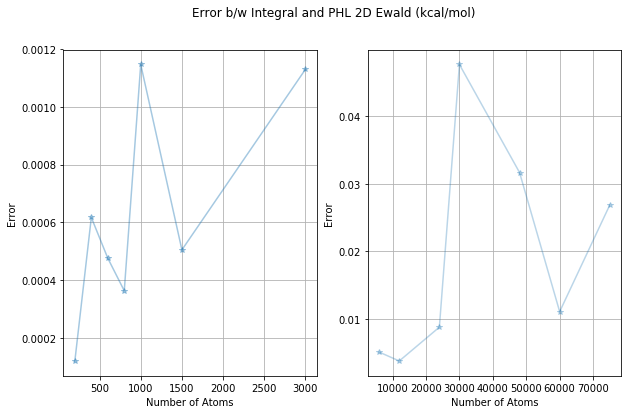

In [177]:
fig, ax = plt.subplots(1, 2,figsize=(10,6))
fig.suptitle("Error b/w Integral and PHL 2D Ewald (kcal/mol)")
ax[0].plot('Number of Atoms','error', data=out[out['Number of Atoms'] < 3001], marker='*', alpha=0.4)
ax[0].set_xlabel("Number of Atoms")
ax[0].set_ylabel("Error")
ax[0].grid()
 
# And now add something in the second part:
ax[1].plot(  'Number of Atoms','error', data=out[out['Number of Atoms'] > 3001], marker='*', alpha=0.3)
ax[1].set_xlabel("Number of Atoms")
ax[1].set_ylabel("Error")
ax[1].grid()
# Show the graph
plt.show()

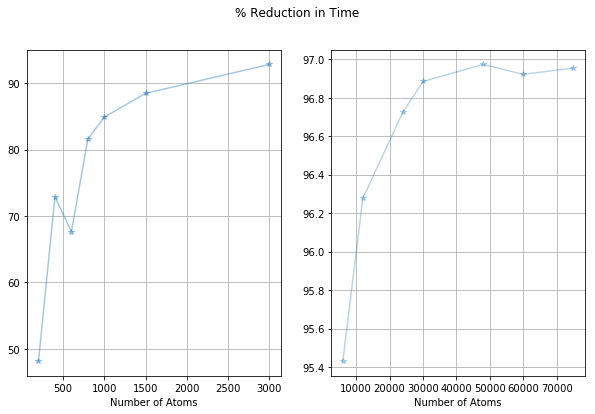

In [178]:
fig, ax = plt.subplots(1, 2,figsize=(10,6))
fig.suptitle("% Reduction in Time")
ax[0].plot('Number of Atoms','%Reduction in Time', data=out[out['Number of Atoms'] < 3001], marker='*', alpha=0.4)
ax[0].set_xlabel("Number of Atoms")
ax[0].grid()
 
# And now add something in the second part:
ax[1].plot(  'Number of Atoms','%Reduction in Time', data=out[out['Number of Atoms'] > 3001], marker='*', alpha=0.3)
ax[1].set_xlabel("Number of Atoms")
ax[1].grid()
# Show the graph
plt.show()